In [9]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict,Annotated
from langchain_core.messages import BaseMessage,HumanMessage,AIMessage


In [10]:
from langgraph.graph.message import add_messages
class Chatbot(TypedDict):
    messages:list[BaseMessage]

In [11]:
model=ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [12]:
def chatbot(state:Chatbot):
    query=state['messages']
    print("STAge")
    print(query)

    response=model.invoke(query)

    return {'messages':[response]}

    

In [13]:
graph=StateGraph(Chatbot)

graph.add_node("chatbot",chatbot)

graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)

workflow=graph.compile()

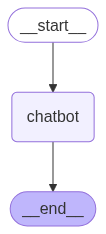

In [14]:
workflow

In [ ]:
initial_state={
    'messages':[]
}
while True:
    query=input("Enter the user query")
    query=query.lower().strip()
    initial_state['messages'].append(HumanMessage(content=query))
    response=workflow.invoke(initial_state)
    print("AI",response['messages'][-1])   
    

STAge
[HumanMessage(content='hi', additional_kwargs={}, response_metadata={})]
AI content='Hi there! How can I help you today?' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []} id='run--30731513-4fa8-4656-b2df-df00d162bedb-0' usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}}
STAge
[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), HumanMessage(content='my name is akshay', additional_kwargs={}, response_metadata={})]
AI content="Hi Akshay!  It's nice to meet you." additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []} id='run--0d15e805-c908-4d94-a5c9-ad259e2ff7c2-0' usage_metadata={'input_tokens': 6, 'output_tokens': 13, 'total_tokens': 19, 

In [ ]:
from langchain.schema import HumanMessage, AIMessage

# Simulated LangGraph state
state = {
    "messages": [HumanMessage(content="Hi there!")]
}

# Simulated model response
response = AIMessage(content="Hello! How can I help you today?")

# Forgot to update state
new_state = state  # no change made

# Output
print([msg.content for msg in new_state["messages"]])


['Hi there!']


In [ ]:
from langgraph.graph.message import add_messages
from langchain.schema import HumanMessage, AIMessage

# Simulated LangGraph state
state = {
    "messages": [HumanMessage(content="Hi there!")]
}

# Simulated model response
response = AIMessage(content="Hello! How can I help you today?")

# Add response to state
new_state = add_messages(state, [response])

# Output
print([msg.content for msg in new_state["messages"]])


ValueError: Message dict must contain 'role' and 'content' keys, got {'messages': [HumanMessage(content='Hi there!', additional_kwargs={}, response_metadata={})]}
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/MESSAGE_COERCION_FAILURE 